In [16]:
!pip install adjustText


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd

In [2]:
deg_females_over_80 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Female_>80.csv", index_col=0)

deg_females_70_80 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Female_70-80.csv", index_col=0)

deg_females_50_70 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Female_50-70.csv", index_col=0)

deg_females_30_50 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Female_30-50.csv", index_col=0)

deg_males_over_80 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Male_>80.csv", index_col=0)

deg_males_70_80 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Male_70-80.csv", index_col=0)

deg_males_50_70 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Male_50-70.csv", index_col=0)

deg_males_30_50 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Male_30-50.csv", index_col=0)

In [3]:
import anndata as ad
ppmi_ad = ad.read_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_adata.h5ad")

In [4]:
# Get gene symbol mapping
symbol_mapping = ppmi_ad.varm['symbol_ensembl_mapping']
ensembl_to_symbol = dict(zip(symbol_mapping.index, symbol_mapping['gene_symbol']))

In [11]:
# deg_females_over_80['symbol'] = deg_females_over_80.index.map(ensembl_to_symbol)
# deg_females_70_80['symbol'] = deg_females_70_80.index.map(ensembl_to_symbol)
# deg_females_50_70['symbol'] = deg_females_50_70.index.map(ensembl_to_symbol)
# deg_females_30_50['symbol'] = deg_females_30_50.index.map(ensembl_to_symbol)
#
# deg_males_over_80['symbol'] = deg_males_over_80.index.map(ensembl_to_symbol)
# deg_males_70_80['symbol'] = deg_males_70_80.index.map(ensembl_to_symbol)
# deg_males_50_70['symbol'] = deg_males_50_70.index.map(ensembl_to_symbol)
# deg_males_30_50['symbol'] = deg_males_30_50.index.map(ensembl_to_symbol)


In [5]:
deg_males_30_50_limit = deg_males_30_50[(deg_males_30_50['log2FoldChange'].abs() >= 1) & (deg_males_30_50['padj'] <= 0.05)]
deg_males_50_70_limit = deg_males_50_70[(deg_males_50_70['log2FoldChange'].abs() >= 1) & (deg_males_50_70['padj'] <= 0.05)]
deg_males_70_80_limit = deg_males_70_80[(deg_males_70_80['log2FoldChange'].abs() >= 1) & (deg_males_70_80['padj'] <= 0.05)]
deg_males_over_80_limit = deg_males_over_80[(deg_males_over_80['log2FoldChange'].abs() >= 1) & (deg_males_over_80['padj'] <= 0.05)]

deg_females_30_50_limit = deg_females_30_50[(deg_females_30_50['log2FoldChange'].abs() >= 1) & (deg_females_30_50['padj'] <= 0.05)]
deg_females_50_70_limit = deg_females_50_70[(deg_females_50_70['log2FoldChange'].abs() >= 1) & (deg_females_50_70['padj'] <= 0.05)]
deg_females_70_80_limit = deg_females_70_80[(deg_females_70_80['log2FoldChange'].abs() >= 1) & (deg_females_70_80['padj'] <= 0.05)]
deg_females_over_80_limit = deg_females_over_80[(deg_females_over_80['log2FoldChange'].abs() >= 1) & (deg_females_over_80['padj'] <= 0.05)]



### DEGs for Males 30-50 yo.

In [17]:
deg_males_30_50_limit

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Gene,,,,,,,
ENSG00000253703.2,0.871481,21.976052,2.439037,9.010136,2.058004e-19,1.177013e-14,IGHV1-68
ENSG00000239808.3,0.337276,25.675006,3.087002,8.317133,9.011654e-17,2.576973e-12,RN7SL255P
ENSG00000262259.1,0.275417,19.962450,3.088367,6.463755,1.021360e-10,1.947120e-06,MTND4LP24
ENSG00000276540.1,1.017024,17.499452,3.087440,5.667949,1.445172e-08,2.066306e-04,REXO1L10P
ENSG00000225287.1,0.177637,14.207984,3.090203,4.597750,4.270773e-06,4.885081e-02,OFD1P13Y


### DEGs for Males 50-70 yo.

In [18]:
deg_males_50_70_limit

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Gene,,,,,,,
ENSG00000229807.11,113.995572,-2.958401,0.397404,-7.444316,9.744815e-14,2.889045e-09,XIST
ENSG00000185640.5,25.376946,-1.456439,0.228535,-6.372922,1.854597e-10,2.749162e-06,KRT79
ENSG00000243366.3,83.963389,2.539189,0.446530,5.686495,1.296733e-08,9.611061e-05,RN7SL60P
ENSG00000199883.1,17.981382,-1.999717,0.351655,-5.686595,1.295975e-08,9.611061e-05,RN7SKP90
ENSG00000239710.3,4.547767,-1.998197,0.358512,-5.573591,2.495408e-08,1.479627e-04,RN7SL692P
ENSG00000207005.1,177.846630,-1.394378,0.263766,-5.286429,1.247275e-07,6.162995e-04,RNU1-2
ENSG00000278917.1,12.575200,-1.219904,0.242668,-5.027044,4.980975e-07,1.845887e-03,ENSG00000278917
ENSG00000228549.3,716.721188,2.358082,0.513946,4.588187,4.471128e-06,1.104629e-02,LINC03126
ENSG00000227674.2,14.339359,1.961992,0.447639,4.382978,1.170679e-05,2.169196e-02,LINC00355


### DEGs for Males 70-80 yo.

In [19]:
deg_males_70_80_limit

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Gene,,,,,,,
ENSG00000231930.1,0.108669,29.909668,3.294963,9.077392,1.112075e-19,6.369407e-15,ENSG00000231930
ENSG00000250650.1,0.417027,16.701470,1.893583,8.820036,1.144229e-18,3.276785e-14,LOC107986375
ENSG00000274959.1,0.095551,26.283800,3.294366,7.978410,1.482305e-15,2.829967e-11,ENSG00000274959
ENSG00000225276.1,0.093106,24.865863,3.295020,7.546498,4.471180e-14,6.402170e-10,MTND1P18
ENSG00000277422.1,0.075518,19.597486,3.294954,5.947727,2.718916e-09,3.114518e-05,REXO1L6P
ENSG00000228549.3,288.868943,-3.825736,0.703351,-5.439297,5.349112e-08,5.106173e-04,LINC03126


### DEGs for Males over 80 yo.

In [20]:
deg_males_over_80_limit

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Gene,,,,,,,
ENSG00000236068.2,3.866019,-29.987055,3.963747,-7.565331,3.868791e-14,2.159327e-09,NT5ELP
ENSG00000253108.1,4.043711,-20.951575,4.000730,-5.236938,1.632628e-07,4.196078e-03,ENSG00000253108
ENSG00000253658.5,2.893154,-20.914789,4.082531,-5.122996,3.007187e-07,4.196078e-03,LINC01592
ENSG00000253682.1,4.085633,-20.494778,3.980077,-5.149342,2.614017e-07,4.196078e-03,ENSG00000253682
ENSG00000199790.1,0.566701,-29.998341,5.954489,-5.037937,4.705754e-07,4.377449e-03,RNU6-836P
...,...,...,...,...,...,...,...
ENSG00000260994.1,2.229653,-20.184737,4.980806,-4.052504,5.067237e-05,3.770970e-02,AGGF1P7
ENSG00000254041.1,2.187731,-20.255034,5.022880,-4.032554,5.517390e-05,3.898071e-02,LINC03084
ENSG00000187005.4,2.187731,-20.255034,5.022880,-4.032554,5.517390e-05,3.898071e-02,KRTAP21-1


### DEGs for Females 30-50 yo.

In [21]:
deg_females_30_50_limit

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Gene,,,,,,,
ENSG00000200179.1,0.242846,29.804264,2.991858,9.961791,2.239899e-23,1.266282e-18,Y_RNA
ENSG00000261665.2,0.470144,29.868454,3.269539,9.135371,6.518267e-20,1.842486e-15,TUBAP4
ENSG00000241136.1,0.374907,29.305220,3.348387,8.752040,2.095300e-18,3.948453e-14,PAICSP6
ENSG00000275414.1,0.289293,30.000000,3.707775,8.091105,5.912590e-16,2.125265e-12,ENSG00000275414
ENSG00000248417.1,0.352475,30.000000,3.710022,8.086206,6.155199e-16,2.125265e-12,ENSG00000248417
...,...,...,...,...,...,...,...
ENSG00000257078.1,0.161227,15.139820,3.717539,4.072539,4.650348e-05,2.246993e-02,ENSG00000257078
ENSG00000235146.2,0.455612,15.081171,3.717458,4.056851,4.973885e-05,2.365069e-02,ENSG00000235146
ENSG00000254804.1,0.229155,15.073909,3.715861,4.056639,4.978388e-05,2.365069e-02,ENSG00000254804


### DEGs for Females 50-70 yo.

In [22]:
deg_females_50_70_limit

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Gene,,,,,,,
ENSG00000228549.3,536.905950,3.817776,0.628964,6.069939,1.279591e-09,0.000073,LINC03126
ENSG00000123838.10,127.104697,-1.693648,0.350750,-4.828646,1.374645e-06,0.026143,C4BPA
ENSG00000278099.1,11.661937,-1.347496,0.290134,-4.644397,3.410711e-06,0.048648,RNVU1-2A


### DEGs for Females 70-80 yo.

In [23]:
deg_females_70_80_limit

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Gene,,,,,,,
ENSG00000276960.1,0.620888,27.622050,1.894085,14.583319,3.586465e-48,2.022264e-43,ENSG00000276960
ENSG00000250580.1,0.440395,29.996827,2.330893,12.869240,6.705900e-38,1.890594e-33,SNRPCP8
ENSG00000170920.2,0.976722,29.996934,2.365293,12.682120,7.429474e-37,1.396394e-32,OR7G3
ENSG00000228020.2,1.017055,29.871105,2.362393,12.644425,1.200994e-36,1.692981e-32,HNRNPA1P46
ENSG00000277213.1,0.679004,24.662974,1.971636,12.508887,6.675258e-36,7.527822e-32,SDR42E1P2
...,...,...,...,...,...,...,...
ENSG00000237262.1,0.299029,14.816001,3.902840,3.796210,1.469249e-04,3.787591e-02,ENSG00000237262
ENSG00000225167.1,0.401715,14.397385,3.798575,3.790207,1.505215e-04,3.857867e-02,TXNP2
ENSG00000255039.1,0.115949,14.768392,3.909335,3.777725,1.582678e-04,4.038048e-02,LINC02553


### DEGs for Females over 80 yo.

In [24]:
deg_females_over_80_limit

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Gene,,,,,,,
ENSG00000237550.5,467.566774,-5.939131,0.840824,-7.063469,1.623959e-12,7.382355e-08,ENSG00000237550
ENSG00000239607.3,313.711891,-5.134316,0.801311,-6.407392,1.480295e-10,3.364637e-06,RN7SL573P
ENSG00000277918.1,329.955503,-4.922449,0.856837,-5.744907,9.197158e-09,1.393645e-04,RNVU1-28
ENSG00000239888.3,5824.506366,-27.556659,5.325768,-5.174213,2.288739e-07,2.601094e-03,RN7SL792P
ENSG00000261349.1,193.339645,-10.700797,2.130291,-5.023162,5.082761e-07,4.131371e-03,ENSG00000261349
ENSG00000137267.5,945.002691,-3.676639,0.733911,-5.009651,5.452875e-07,4.131371e-03,TUBB2A
ENSG00000206652.1,233.567786,-5.052918,1.060891,-4.762901,1.908298e-06,1.239276e-02,RNU1-1


## DEG Visualization - Males

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_36363/982966774.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['significance'] = 'Non-significant'
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_36363/982966774.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['significance'] = 'Non-significant'
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_36363/982966774.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

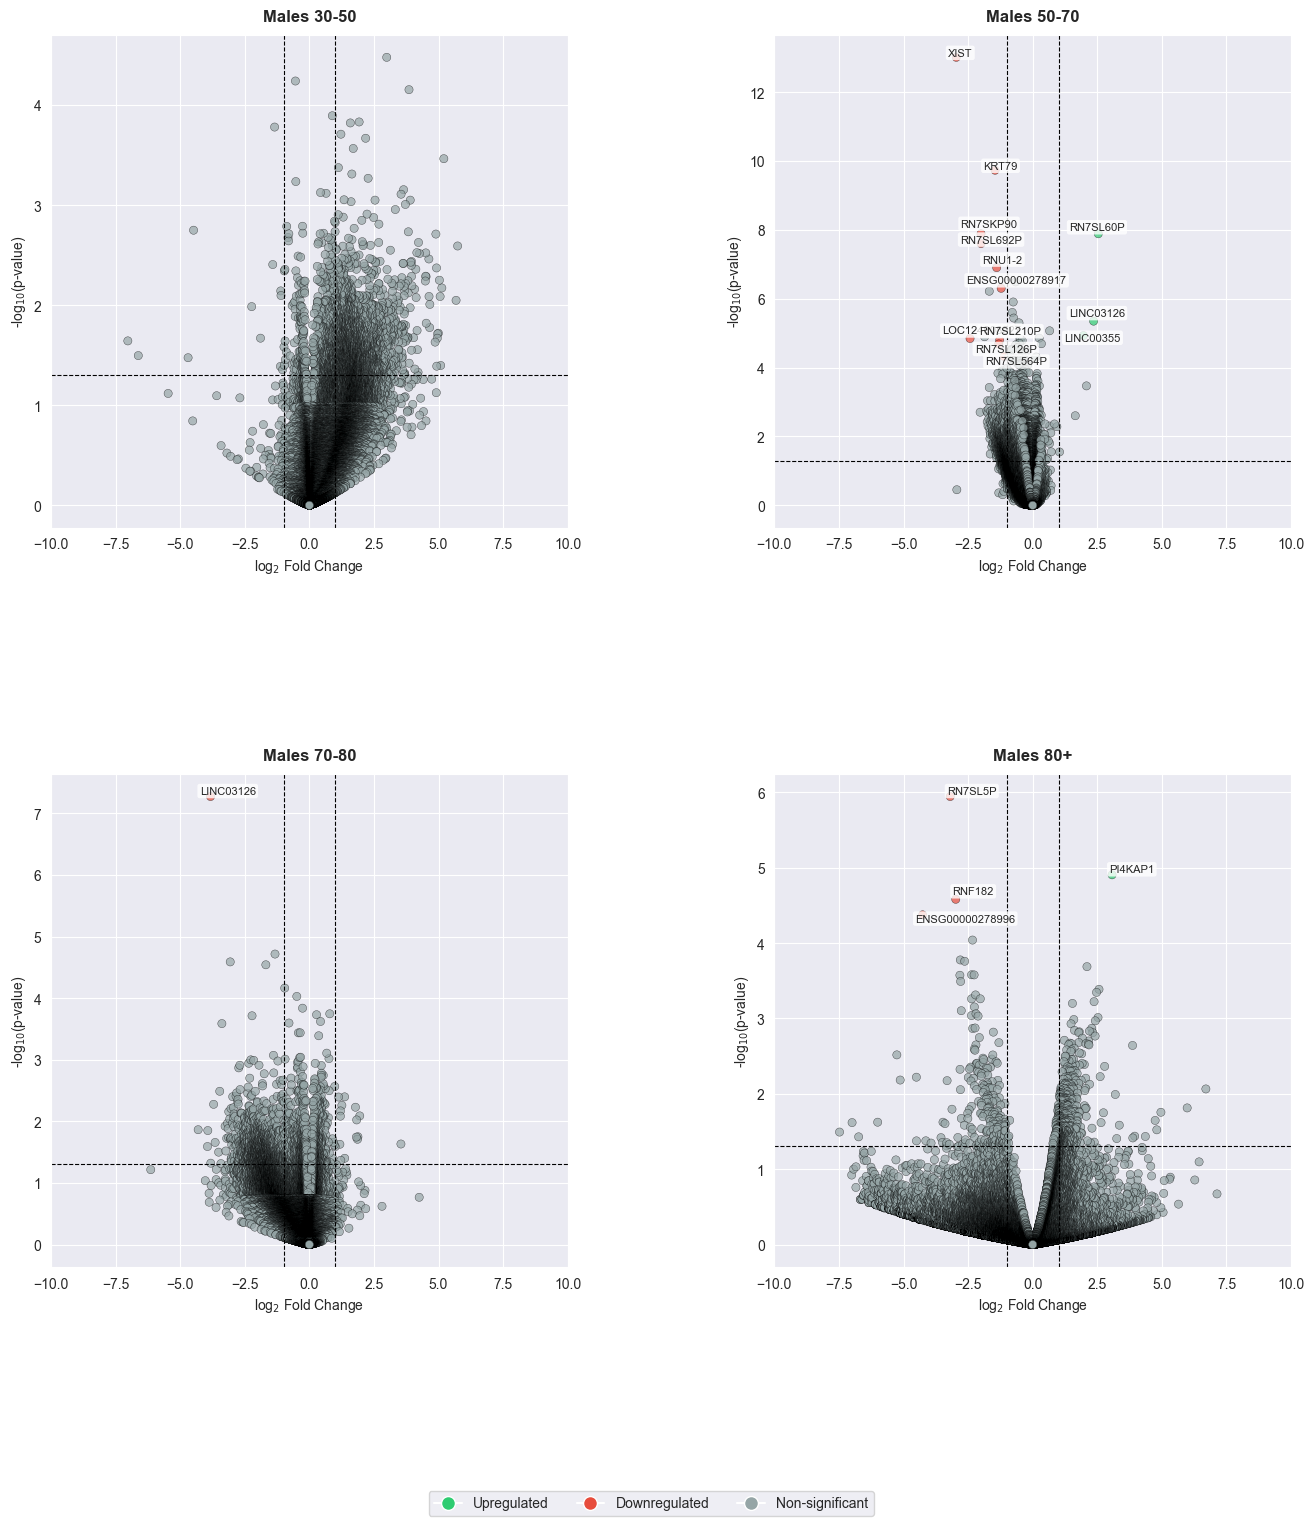


Extreme upregulated genes (>10 FC) by age group:

30-50 (6 genes):
                    gene_symbol  log2FoldChange          padj
Gene                                                         
ENSG00000239808.3     RN7SL255P       25.675006  2.576973e-12
ENSG00000253703.2      IGHV1-68       21.976052  1.177013e-14
ENSG00000262259.1     MTND4LP24       19.962450  1.947120e-06
ENSG00000276540.1     REXO1L10P       17.499452  2.066306e-04
ENSG00000225287.1      OFD1P13Y       14.207984  4.885081e-02
ENSG00000212191.1  LOC124900186       10.166479  5.556550e-01

50-70 (1 genes):
                    gene_symbol  log2FoldChange  padj
Gene                                                 
ENSG00000278591.1  LOC124904144       24.254103   NaN

70-80 (5 genes):
                       gene_symbol  log2FoldChange          padj
Gene                                                            
ENSG00000231930.1  ENSG00000231930       29.909668  6.369407e-15
ENSG00000274959.1  ENSG00000274959       26

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from adjustText import adjust_text

# Initialize dictionaries to store extreme values
extreme_upregulated_males = {}
extreme_downregulated_males = {}

# Modified plotting function with extreme value filtering
def plot_volcano_with_filtering(ax, df, title, age_group):
    df = df.copy()
    df['gene_symbol'] = df.index.map(ensembl_to_symbol)
    df['-log10(padj)'] = -np.log10(df['padj'])
    df['-log10(pvalue)'] = -np.log10(df['pvalue'])

    # Identify extreme values (|log2FoldChange| > 10)
    extreme_mask = df['log2FoldChange'].abs() > 10
    extreme_df = df[extreme_mask].copy()

    # Store extreme values separately
    extreme_upregulated_males[age_group] = extreme_df[extreme_df['log2FoldChange'] > 10]
    extreme_downregulated_males[age_group] = extreme_df[extreme_df['log2FoldChange'] < -10]

    # Filter for plotting
    plot_df = df[~extreme_mask]

    # Classify points
    plot_df['significance'] = 'Non-significant'
    sig_mask = (plot_df['padj'] <= padj_threshold)
    plot_df.loc[sig_mask & (plot_df['log2FoldChange'] >= logfc_threshold), 'significance'] = 'Upregulated'
    plot_df.loc[sig_mask & (plot_df['log2FoldChange'] <= -logfc_threshold), 'significance'] = 'Downregulated'

    # Plot
    scatter = sns.scatterplot(
        data=plot_df,
        x='log2FoldChange',
        y='-log10(pvalue)',
        hue='significance',
        hue_order=['Upregulated', 'Downregulated', 'Non-significant'],
        palette={'Upregulated': '#2ecc71', 'Downregulated': '#e74c3c', 'Non-significant': '#95a5a6'},
        alpha=alpha_value,
        s=point_size,
        edgecolor='black',
        linewidth=0.3,
        ax=ax
    )

    # Label significant points (excluding extremes)
    sig_df = plot_df[plot_df['significance'].isin(['Upregulated', 'Downregulated'])]
    sig_df = sig_df[
        (sig_df['padj'] <= 0.05) &
        (sig_df['log2FoldChange'].abs() >= 1)
    ].sort_values(['significance', 'padj'])

    texts = []
    for _, row in sig_df.iterrows():
        texts.append(ax.text(
            row['log2FoldChange'],
            row['-log10(pvalue)'],
            row['gene_symbol'],
            fontsize=8,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, pad=0.2, edgecolor='none')
        ))

    adjust_text(texts,
               ax=ax,
               only_move={'points':'y', 'text':'xy'},  # Basic movement
               force_text=0.2,                         # Single force value
               expand_points=(2, 2),                   # Strong expansion
               precision=0.001)

    # Add thresholds
    ax.axhline(-np.log10(padj_threshold), color='black', linestyle='--', linewidth=0.8)
    ax.axvline(-logfc_threshold, color='black', linestyle='--', linewidth=0.8)
    ax.axvline(logfc_threshold, color='black', linestyle='--', linewidth=0.8)
    ax.set_xlim(-10, 10)  # Set consistent x-axis limits

    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('log$_2$ Fold Change', fontsize=10)
    ax.set_ylabel('-log$_{10}$(p-value)', fontsize=10)
    ax.get_legend().remove()

# Parameters
padj_threshold = 0.05
logfc_threshold = 1
point_size = 35
alpha_value = 0.7

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.subplots_adjust(wspace=0.4, hspace=0.5)

# Plot each dataframe
plot_volcano_with_filtering(axes[0,0], deg_males_30_50, "Males 30-50", "30-50")
plot_volcano_with_filtering(axes[0,1], deg_males_50_70, "Males 50-70", "50-70")
plot_volcano_with_filtering(axes[1,0], deg_males_70_80, "Males 70-80", "70-80")
plot_volcano_with_filtering(axes[1,1], deg_males_over_80, "Males 80+", "80+")

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Upregulated',
              markerfacecolor='#2ecc71', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Downregulated',
              markerfacecolor='#e74c3c', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Non-significant',
              markerfacecolor='#95a5a6', markersize=10)
]

fig.legend(handles=legend_elements,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.05),
          ncol=3,
          frameon=True)

# plt.savefig('filtered_volcano_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Access extreme values for further analysis
print("\nExtreme upregulated genes (>10 FC) by age group:")
for age_group, df in extreme_upregulated_males.items():
    print(f"\n{age_group} ({len(df)} genes):")
    print(df[['gene_symbol', 'log2FoldChange', 'padj']].sort_values('log2FoldChange', ascending=False))

print("\nExtreme downregulated genes (<-10 FC) by age group:")
for age_group, df in extreme_downregulated_males.items():
    print(f"\n{age_group} ({len(df)} genes):")
    print(df[['gene_symbol', 'log2FoldChange', 'padj']].sort_values('log2FoldChange'))

## DEG Visualization - Females

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_36363/3722550410.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['significance'] = 'Non-significant'
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_36363/3722550410.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['significance'] = 'Non-significant'
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_36363/3722550410.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

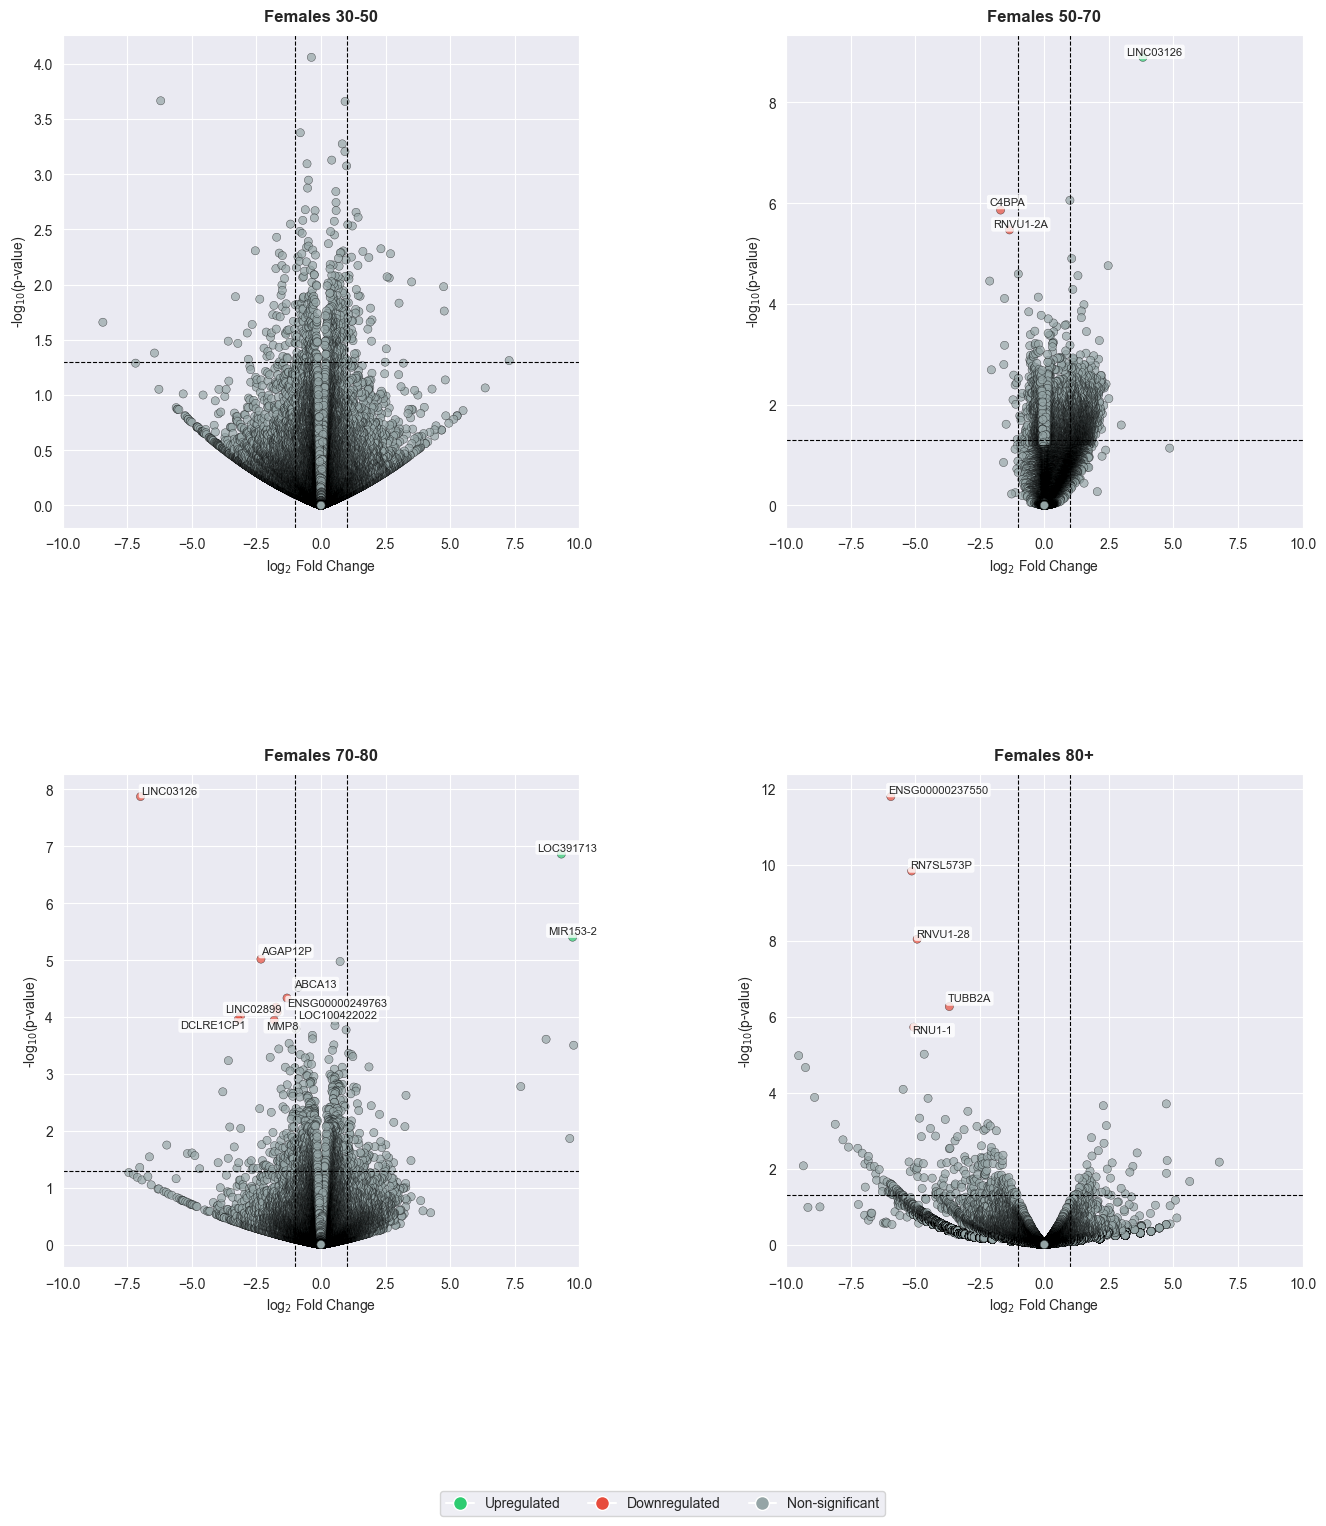


Extreme upregulated genes (>10 FC) by age group:

30-50 (108 genes):
                       gene_symbol  log2FoldChange          padj
Gene                                                            
ENSG00000275414.1  ENSG00000275414       30.000000  2.125265e-12
ENSG00000248417.1  ENSG00000248417       30.000000  2.125265e-12
ENSG00000258170.1  ENSG00000258170       30.000000  2.125265e-12
ENSG00000238003.1          RPL10P4       29.999860  2.125265e-12
ENSG00000212424.1        RNU1-119P       29.999860  2.125265e-12
...                            ...             ...           ...
ENSG00000201827.1  ENSG00000201827       12.569901  3.094489e-01
ENSG00000251936.1        RNA5SP249       12.569901  3.094489e-01
ENSG00000206650.1         SNORA70G       12.569901  3.094489e-01
ENSG00000260335.1  ENSG00000260335       11.845011  5.891533e-01
ENSG00000184724.5         KRTAP6-1       10.966877  9.999969e-01

[108 rows x 3 columns]

50-70 (0 genes):
Empty DataFrame
Columns: [gene_symbol, log2

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from adjustText import adjust_text

# Get gene symbol mapping
symbol_mapping = ppmi_ad.varm['symbol_ensembl_mapping']
ensembl_to_symbol = dict(zip(symbol_mapping.index, symbol_mapping['gene_symbol']))

# Initialize dictionaries to store extreme values
extreme_upregulated_males = {}
extreme_downregulated_males = {}

# Modified plotting function with extreme value filtering
def plot_volcano_with_filtering(ax, df, title, age_group):
    df = df.copy()
    df['gene_symbol'] = df.index.map(ensembl_to_symbol)
    df['-log10(padj)'] = -np.log10(df['padj'])
    df['-log10(pvalue)'] = -np.log10(df['pvalue'])

    # Identify extreme values (|log2FoldChange| > 10)
    extreme_mask = df['log2FoldChange'].abs() > 10
    extreme_df = df[extreme_mask].copy()

    # Store extreme values separately
    extreme_upregulated_males[age_group] = extreme_df[extreme_df['log2FoldChange'] > 10]
    extreme_downregulated_males[age_group] = extreme_df[extreme_df['log2FoldChange'] < -10]

    # Filter for plotting
    plot_df = df[~extreme_mask]

    # Classify points
    plot_df['significance'] = 'Non-significant'
    sig_mask = (plot_df['padj'] <= padj_threshold)
    plot_df.loc[sig_mask & (plot_df['log2FoldChange'] >= logfc_threshold), 'significance'] = 'Upregulated'
    plot_df.loc[sig_mask & (plot_df['log2FoldChange'] <= -logfc_threshold), 'significance'] = 'Downregulated'

    # Plot
    scatter = sns.scatterplot(
        data=plot_df,
        x='log2FoldChange',
        y='-log10(pvalue)',
        hue='significance',
        hue_order=['Upregulated', 'Downregulated', 'Non-significant'],
        palette={'Upregulated': '#2ecc71', 'Downregulated': '#e74c3c', 'Non-significant': '#95a5a6'},
        alpha=alpha_value,
        s=point_size,
        edgecolor='black',
        linewidth=0.3,
        ax=ax
    )

    # Label significant points (excluding extremes)
    sig_df = plot_df[plot_df['significance'].isin(['Upregulated', 'Downregulated'])]
    sig_df = sig_df[
        (sig_df['padj'] <= 0.05) &
        (sig_df['log2FoldChange'].abs() >= 1)
    ].sort_values(['significance', 'padj'])

    texts = []
    for _, row in sig_df.iterrows():
        texts.append(ax.text(
            row['log2FoldChange'],
            row['-log10(pvalue)'],
            row['gene_symbol'],
            fontsize=8,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, pad=0.2, edgecolor='none')
        ))

    adjust_text(texts,
               ax=ax,
               only_move={'points':'y', 'text':'xy'},  # Basic movement
               force_text=0.2,                         # Single force value
               expand_points=(2, 2),                   # Strong expansion
               precision=0.001)

    # Add thresholds
    ax.axhline(-np.log10(padj_threshold), color='black', linestyle='--', linewidth=0.8)
    ax.axvline(-logfc_threshold, color='black', linestyle='--', linewidth=0.8)
    ax.axvline(logfc_threshold, color='black', linestyle='--', linewidth=0.8)
    ax.set_xlim(-10, 10)  # Set consistent x-axis limits

    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('log$_2$ Fold Change', fontsize=10)
    ax.set_ylabel('-log$_{10}$(p-value)', fontsize=10)
    ax.get_legend().remove()

# Parameters
padj_threshold = 0.05
logfc_threshold = 1
point_size = 35
alpha_value = 0.7

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.subplots_adjust(wspace=0.4, hspace=0.5)

# Plot each dataframe
plot_volcano_with_filtering(axes[0,0], deg_females_30_50, "Females 30-50", "30-50")
plot_volcano_with_filtering(axes[0,1], deg_females_50_70, "Females 50-70", "50-70")
plot_volcano_with_filtering(axes[1,0], deg_females_70_80, "Females 70-80", "70-80")
plot_volcano_with_filtering(axes[1,1], deg_females_over_80, "Females 80+", "80+")

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Upregulated',
              markerfacecolor='#2ecc71', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Downregulated',
              markerfacecolor='#e74c3c', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Non-significant',
              markerfacecolor='#95a5a6', markersize=10)
]

fig.legend(handles=legend_elements,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.05),
          ncol=3,
          frameon=True)

# plt.savefig('filtered_volcano_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Access extreme values for further analysis
print("\nExtreme upregulated genes (>10 FC) by age group:")
for age_group, df in extreme_upregulated_males.items():
    print(f"\n{age_group} ({len(df)} genes):")
    print(df[['gene_symbol', 'log2FoldChange', 'padj']].sort_values('log2FoldChange', ascending=False))

print("\nExtreme downregulated genes (<-10 FC) by age group:")
for age_group, df in extreme_downregulated_males.items():
    print(f"\n{age_group} ({len(df)} genes):")
    print(df[['gene_symbol', 'log2FoldChange', 'padj']].sort_values('log2FoldChange'))

## Functional Enrichment per strata
___
Age groups 30-50 for both main strata have been omitted since no statistically significant differential expressions with respect to the 2x fold change were detected

In [31]:
!pip install gseapy

  Using cached gseapy-1.1.8-cp312-cp312-macosx_10_12_x86_64.whl

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [8]:
symbol_mapping = ppmi_ad.varm['symbol_ensembl_mapping']
ensembl_to_symbol = dict(zip(symbol_mapping.index, symbol_mapping['gene_symbol']))
deg_males_50_70['gene_symbol'] = deg_males_50_70.index.map(ensembl_to_symbol)
deg_males_70_80['gene_symbol'] = deg_males_50_70.index.map(ensembl_to_symbol)
deg_males_over_80['gene_symbol'] = deg_males_50_70.index.map(ensembl_to_symbol)

deg_males_50_70_down = deg_males_50_70[(deg_males_50_70['log2FoldChange'] <= -1) & (deg_males_50_70['log2FoldChange'] > -10) & (deg_males_50_70['padj'] <= 0.05)]
deg_males_50_70_up = deg_males_50_70[(deg_males_50_70['log2FoldChange'] >= 1) & (deg_males_50_70['log2FoldChange'] < 10) & (deg_males_50_70['padj'] <= 0.05)]

deg_males_70_80_down = deg_males_70_80[(deg_males_70_80['log2FoldChange'] <= -1) & (deg_males_70_80['log2FoldChange'] > -10) & (deg_males_70_80['padj'] <= 0.05)]
deg_males_70_80_up = deg_males_70_80[(deg_males_70_80['log2FoldChange'] >= 1) & (deg_males_70_80['log2FoldChange'] < 10) & (deg_males_70_80['padj'] <= 0.05)]

deg_males_over_80_down = deg_males_over_80[(deg_males_over_80['log2FoldChange'] <= -1) & (deg_males_over_80['log2FoldChange'] > -10) & (deg_males_over_80['padj'] <= 0.05)]
deg_males_over_80_up = deg_males_over_80[(deg_males_over_80['log2FoldChange'] >= 1) & (deg_males_over_80['log2FoldChange'] < 10) & (deg_males_over_80['padj'] <= 0.05)]

In [9]:
deg_females_50_70['gene_symbol'] = deg_females_50_70.index.map(ensembl_to_symbol)
deg_females_70_80['gene_symbol'] = deg_females_50_70.index.map(ensembl_to_symbol)
deg_females_over_80['gene_symbol'] = deg_females_50_70.index.map(ensembl_to_symbol)

deg_females_50_70_down = deg_females_50_70[(deg_females_50_70['log2FoldChange'] <= -1) & (deg_females_50_70['log2FoldChange'] > -10) & (deg_females_50_70['padj'] <= 0.05)]
deg_females_50_70_up = deg_females_50_70[(deg_females_50_70['log2FoldChange'] >= 1) & (deg_females_50_70['log2FoldChange'] < 10) & (deg_females_50_70['padj'] <= 0.05)]

deg_females_70_80_down = deg_females_70_80[(deg_females_70_80['log2FoldChange'] <= -1) & (deg_females_70_80['log2FoldChange'] > -10) & (deg_females_70_80['padj'] <= 0.05)]
deg_females_70_80_up = deg_females_70_80[(deg_females_70_80['log2FoldChange'] >= 1) & (deg_females_70_80['log2FoldChange'] < 10) & (deg_females_70_80['padj'] <= 0.05)]

deg_females_over_80_down = deg_females_over_80[(deg_females_over_80['log2FoldChange'] <= -1) & (deg_females_over_80['log2FoldChange'] > -10) & (deg_females_over_80['padj'] <= 0.05)]
deg_females_over_80_up = deg_females_over_80[(deg_females_over_80['log2FoldChange'] >= 1) & (deg_females_over_80['log2FoldChange'] < 10) & (deg_females_over_80['padj'] <= 0.05)]

In [55]:
import gseapy as gp
gene_sets = ['MSigDB_Hallmark_2020',
                'KEGG_2021_Human',
                'WikiPathways_2024_Human',
                'Human_Phenotype_Ontology',
                'GO_Biological_Process_2025',
                'GO_Molecular_Function_2025',
                'GO_Cellular_Component_2025',
                'SynGO_2024',
                'OMIM_Disease']

enr_males_50_70_down = pd.DataFrame()
if not deg_males_50_70_down.empty:
    enr_males_50_70_down = gp.enrichr(gene_list=deg_males_50_70_down['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_males_50_70_up = pd.DataFrame()
if not deg_males_50_70_up.empty:
    enr_males_50_70_up = gp.enrichr(gene_list=deg_males_50_70_up['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_males_70_80_down = pd.DataFrame()
if not deg_males_70_80_down.empty:
    enr_males_70_80_down = gp.enrichr(gene_list=deg_males_70_80_down['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_males_70_80_up = pd.DataFrame()
if not deg_males_70_80_up.empty:
    enr_males_70_80_up = gp.enrichr(gene_list=deg_males_70_80_up['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_males_over_80_down = pd.DataFrame()
if not deg_males_over_80_down.empty:
    enr_males_over_80_down = gp.enrichr(gene_list=deg_males_over_80_down['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_males_over_80_up = pd.DataFrame()
if not deg_males_over_80_up.empty:
    enr_males_over_80_up = gp.enrichr(gene_list=deg_males_over_80_up['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)
/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)
/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12

## GSEA Males 50-70 yo.
___

### Upregulated

In [56]:
enr_males_50_70_up.results[enr_males_50_70_up.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


### Downregulated

In [57]:
enr_males_50_70_down.results[enr_males_50_70_down.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
3,Human_Phenotype_Ontology,Spontaneous abortion (HP:0005268),1/11,0.005488,0.010975,0,0,222.000000,1155.569978,XIST
4,Human_Phenotype_Ontology,Abnormal delivery (HP:0001787),1/28,0.013915,0.013915,0,0,82.152263,351.182818,XIST
5,GO_Biological_Process_2025,Intermediate Filament Organization (GO:0045109),1/72,0.035430,0.070860,0,0,31.172144,104.121078,KRT79
7,GO_Cellular_Component_2025,Keratin Filament (GO:0045095),1/39,0.019334,0.034946,0,0,58.339181,230.200184,KRT79
8,GO_Cellular_Component_2025,Intermediate Filament (GO:0005882),1/71,0.034946,0.034946,0,0,31.619048,106.048962,KRT79


## GSEA Males 70-80 yo.
___

### Upregulated

In [58]:
enr_males_70_80_up.results[enr_males_70_80_up.results['P-value'] <= 0.05]

AttributeError: 'DataFrame' object has no attribute 'results'

### Downregulated

In [59]:
enr_males_70_80_down.results[enr_males_70_80_down.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Spliceosome,1/150,0.0075,0.0093,0,0,19850.0,97123.343927,RNU1-2
1,KEGG_2021_Human,RNA transport,1/186,0.0093,0.0093,0,0,19814.0,92684.964511,RNU1-2


## GSEA Males over 80 yo.
___

### Upregulated

In [60]:
enr_males_over_80_up.results[enr_males_over_80_up.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


### Downregulated

In [61]:
enr_males_over_80_down.results[enr_males_over_80_down.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2025,Neurotransmitter-Gated Ion Channel Clustering ...,1/7,0.001050,0.005744,0,0,1665.916667,11427.001555,SHISA7
1,GO_Biological_Process_2025,Positive Regulation of Long-Term Synaptic Pote...,1/14,0.002099,0.005744,0,0,768.615385,4739.656184,SHISA7
2,GO_Biological_Process_2025,Regulation of AMPA Receptor Activity (GO:2000311),1/14,0.002099,0.005744,0,0,768.615385,4739.656184,SHISA7
3,GO_Biological_Process_2025,Postsynaptic Membrane Organization (GO:0001941),1/16,0.002398,0.005744,0,0,666.066667,4018.416231,SHISA7
4,GO_Biological_Process_2025,Regulation of Neurotransmitter Receptor Activi...,1/23,0.003446,0.005744,0,0,453.977273,2574.276639,SHISA7
5,GO_Biological_Process_2025,Gamma-Aminobutyric Acid Signaling Pathway (GO:...,1/23,0.003446,0.005744,0,0,453.977273,2574.276639,SHISA7
6,GO_Biological_Process_2025,Regulation of Long-Term Synaptic Potentiation ...,1/29,0.004344,0.006206,0,0,356.589286,1939.487001,SHISA7
7,GO_Biological_Process_2025,Regulation of Monoatomic Ion Transmembrane Tra...,1/41,0.006138,0.007672,0,0,249.462500,1270.591461,SHISA7
8,GO_Biological_Process_2025,Memory (GO:0007613),1/57,0.008526,0.009473,0,0,178.044643,848.317995,SHISA7
9,GO_Biological_Process_2025,Positive Regulation of Synaptic Transmission (...,1/84,0.012548,0.012548,0,0,119.963855,525.228262,SHISA7


In [52]:
import gseapy as gp
gene_sets = ['MSigDB_Hallmark_2020',
                'KEGG_2021_Human',
                'WikiPathways_2024_Human',
                'Human_Phenotype_Ontology',
                'GO_Biological_Process_2025',
                'GO_Molecular_Function_2025',
                'GO_Cellular_Component_2025',
                'SynGO_2024',
                'OMIM_Disease']

enr_females_50_70_down = pd.DataFrame()
if not deg_females_50_70_down.empty:
    enr_females_50_70_down = gp.enrichr(gene_list=deg_females_50_70_down['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_females_50_70_up = pd.DataFrame()
if not deg_females_50_70_up.empty:
    enr_females_50_70_up = gp.enrichr(gene_list=deg_females_50_70_up['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_females_70_80_down = pd.DataFrame()
if not deg_females_70_80_down.empty:
    enr_females_70_80_down = gp.enrichr(gene_list=deg_females_70_80_down['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_females_70_80_up = pd.DataFrame()
if not deg_females_70_80_up.empty:
    enr_females_70_80_up = gp.enrichr(gene_list=deg_females_70_80_up['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_females_over_80_down = pd.DataFrame()
if not deg_females_over_80_down.empty:
    enr_females_over_80_down = gp.enrichr(gene_list=deg_females_over_80_down['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_females_over_80_up = pd.DataFrame()
if not deg_females_over_80_up.empty:
    enr_females_over_80_up = gp.enrichr(gene_list=deg_females_over_80_up['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)
/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)
/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12

## GSEA Females 50-70 yo.
___

### Upregulated

In [62]:
enr_females_50_70_up.results[enr_females_50_70_up.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


### Downregulated

In [63]:
enr_females_50_70_down.results[enr_females_50_70_down.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Pertussis,1/76,0.007586,0.008482,0,0,265.640000,1296.720424,C4BPA
1,KEGG_2021_Human,Complement and coagulation cascades,1/85,0.008482,0.008482,0,0,237.071429,1130.783865,C4BPA
2,WikiPathways_2024_Human,Complement System WP2806,1/95,0.009478,0.010572,0,0,211.744681,986.481800,C4BPA
3,WikiPathways_2024_Human,Complement System In Neuronal Development And ...,1/106,0.010572,0.010572,0,0,189.457143,861.942822,C4BPA
4,GO_Biological_Process_2025,Negative Regulation of Complement Activation (...,1/12,0.001200,0.004317,0,0,1817.000000,12220.652080,C4BPA
5,GO_Biological_Process_2025,Regulation of Immune Effector Process (GO:0002...,1/14,0.001400,0.004317,0,0,1537.307692,10102.615402,C4BPA
6,GO_Biological_Process_2025,Lymphocyte Mediated Immunity (GO:0002449),1/17,0.001699,0.004317,0,0,1248.875000,7964.758454,C4BPA
7,GO_Biological_Process_2025,T Cell Mediated Immunity (GO:0002456),1/20,0.001999,0.004317,0,0,1051.526316,6535.342984,C4BPA
8,GO_Biological_Process_2025,Adaptive Imm Resp Based on Som Recomb of Imm R...,1/24,0.002399,0.004317,0,0,868.478261,5239.424378,C4BPA
9,GO_Biological_Process_2025,Positive Regulation of Protein Catabolic Proce...,1/99,0.009876,0.014813,0,0,203.061224,937.672554,C4BPA


## GSEA Females over 70-80 yo.
___

### Upregulated

In [64]:
enr_females_70_80_up.results[enr_females_70_80_up.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


### Downregulated

In [65]:
enr_females_70_80_down.results[enr_females_70_80_down.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
2,GO_Biological_Process_2025,Negative Regulation of Calcineurin-Mediated Si...,1/11,0.004392,0.033360,0,0,285.457143,1549.437088,MYOZ1
3,GO_Biological_Process_2025,Negative Regulation of calcineurin-NFAT Signal...,1/11,0.004392,0.033360,0,0,285.457143,1549.437088,MYOZ1
4,GO_Biological_Process_2025,Striated Muscle Cell Development (GO:0055002),1/27,0.010751,0.033360,0,0,109.703297,497.259629,MYOZ1
5,GO_Biological_Process_2025,Negative Regulation of Wound Healing (GO:0061045),1/29,0.011543,0.033360,0,0,101.857143,454.451827,MYOZ1
6,GO_Biological_Process_2025,Regulation of calcineurin-NFAT Signaling Casca...,1/33,0.013126,0.033360,0,0,89.107143,386.114278,MYOZ1
7,GO_Biological_Process_2025,Negative Regulation of Developmental Growth (G...,1/33,0.013126,0.033360,0,0,89.107143,386.114278,MYOZ1
8,GO_Biological_Process_2025,Sarcomere Organization (GO:0045214),1/34,0.013522,0.033360,0,0,86.402597,371.830814,MYOZ1
9,GO_Biological_Process_2025,Skeletal Muscle Organ Development (GO:0060538),1/35,0.013917,0.033360,0,0,83.857143,358.460375,MYOZ1
10,GO_Biological_Process_2025,Striated Muscle Tissue Development (GO:0014706),1/38,0.015102,0.033360,0,0,77.046332,323.050758,MYOZ1
11,GO_Biological_Process_2025,Monoatomic Cation Transport (GO:0006812),1/41,0.016286,0.033360,0,0,71.257143,293.399847,PANX3


## GSEA Females over 80 yo.
___

### Upregulated

In [67]:
enr_females_over_80_up.results[enr_females_over_80_up.results['P-value'] <= 0.05]

AttributeError: 'DataFrame' object has no attribute 'results'

### Downregulated

In [66]:
enr_females_over_80_down.results[enr_females_over_80_down.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Pertussis,1/76,0.018858,0.021072,0,0,66.400000,263.662767,C4BPA
1,KEGG_2021_Human,Complement and coagulation cascades,1/85,0.021072,0.021072,0,0,59.258929,228.728002,C4BPA
2,WikiPathways_2024_Human,Complement System WP2806,1/95,0.023528,0.026223,0,0,52.928191,198.458523,C4BPA
3,WikiPathways_2024_Human,Complement System In Neuronal Development And ...,1/106,0.026223,0.026223,0,0,47.357143,172.432954,C4BPA
4,GO_Biological_Process_2025,Negative Regulation of Complement Activation (...,1/12,0.002997,0.013170,0,0,454.181818,2638.914119,C4BPA
5,GO_Biological_Process_2025,Regulation of Immune Effector Process (GO:0002...,1/14,0.003495,0.013170,0,0,384.269231,2173.545039,C4BPA
6,GO_Biological_Process_2025,Lymphocyte Mediated Immunity (GO:0002449),1/17,0.004243,0.013170,0,0,312.171875,1705.223501,C4BPA
7,GO_Biological_Process_2025,T Cell Mediated Immunity (GO:0002456),1/20,0.004990,0.013170,0,0,262.842105,1393.123889,C4BPA
8,GO_Biological_Process_2025,Adaptive Imm Resp Based on Som Recomb of Imm R...,1/24,0.005986,0.013170,0,0,217.086957,1111.118048,C4BPA
9,GO_Biological_Process_2025,Positive Regulation of Protein Catabolic Proce...,1/99,0.024508,0.044932,0,0,50.757653,188.246816,C4BPA
